In [1]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# load classes
gr = GRAPH()

In [4]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('lines', linewidth=2)

In [7]:
column_names =['gammaC','nuEI','corI', 'spike','non-burst','burst', 'freq','power']
# data_name = '_cortex_fft_gp_1.csv'
# data_name = '_data_7-wii300-n2500-r08.csv'
# data_name = '_data_6-wii500-n2500-r08.csv'
data_name = '_data_8-cc-wii300-n2500-r08.csv'
# data_name = '_data_8-tchu-wii300-n2500-r08.csv'
data_name = "csv_diagram_work_fft_3.csv"
data_name = "_data_13-wii500-n2500-r08-s30.csv"
data_name = "_data_14-wii100-n2500-r08-s30.csv"
data_name = "_data_15-wii100-n2500-r08-s12.csv"
data_name = "_data_16-wii200-n2500-r08-s20.csv"
data_name = "_data_17-wii200-n2500-r08-s20.csv"
data_name = "_data_19-wii1400-n2500-r08-s20.csv"
data_name = "_data_20-wii1400-n2500-r08-s60.csv"
data_name = "_data_21-wii1000-n2500-r08-s60.csv"
data_name = "_data_22-wii1000-n2500-r08-s60.csv"
data_name = "_data_23-wii1000-n500-r08-s60.csv"
data_name = "_data_24-wii900-n500-r08-s60.csv" #TEmean 72
data_name = "_data_25-wii900-n500-r08-s60.csv"  # reduced TEmean to 20
data_name = "_data_26-wii900-n500-r08-s60.csv" #TEmean 5
data_name = "_data_27-wii900-n500-r08-s30.csv" #sigma: 30, wii 900 (before 1000)
# data_name = "_data_28-wii900-n500-r08-s30.csv" #more point, reduced range
# data_name = "_data_29-wii900-n500-r08-s70.csv" #add noise :  too much noise, dark zone of bursting
# data_name = "_data_30-wii900-n500-r08-s40.csv" # lower noise: sigma = 40
# data_name = "_data_31-wii500-n500-r08-s40.csv" #lower WII - too much oscillation before
# data_name = "_data_31-wii100-n500-r08-s30.csv"

path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/%s"%data_name)
# path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/nn_arg/nn/%s"%data_name)
# path = '/Users/guillaume/Downloads/bursts_val-c40_.csv'
df = pd.read_csv(path, names= column_names ,  dtype ='float32' , sep=";")
df = df.fillna(10)
df.head()
df= df[(df['nuEI']<200)]
len(pd.unique(df.nuEI.ravel()))

20

(200,)
(20, 10)


/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


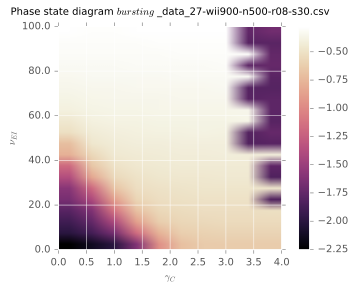

In [9]:
fig=plt.figure(figsize=(6,4))
###################################
# bursting
###################################
dataframe = df[(df['freq']<1000)]
dataframe = df[(df['gammaC']<5)]

title = r'Phase state diagram $bursting$ %s'%data_name
filename = "global_gap_junctions_bursting.pdf" 
dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
column = 'logburst'
ax = fig.add_subplot(111)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=60, extent = [0,4,0,100])
plt.savefig(DIRECTORY + 'bursting_phase_plan_%s.pdf'%data_name)

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


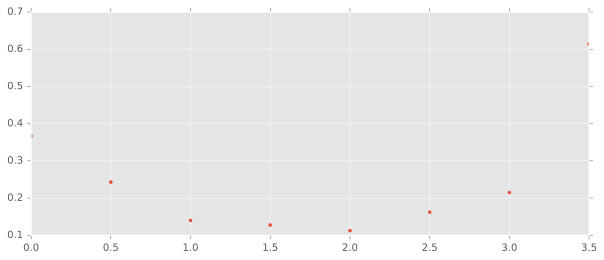

In [36]:
dv = df[ (df['nuEI']==20)]
dv['ratio'] =((dv['burst'])/dv['non-burst'])
# dv['ratio'] = (dv['ratio']).apply(lambda x: (5-x)/5)
vals = dv[['gammaC', 'ratio']].get_values()
plt.plot(vals[:,0],vals[:,1], '.')

In [18]:
# c=0
# figsize = (10,8)
# ###################################
# # spiking
# ###################################
# dataframe = df[(df['freq']<10000)]
# title = r'Phase state diagram $spiking$'
# filename = "global_gap_junctions_c%d_spiking.pdf" %c
# column = 'non-burst'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # bursting
# ###################################
# dataframe = df[(df['freq']<10000)]
# title = r'Phase state diagram $bursting$'
# filename = "global_gap_junctions_c%d_bursting.pdf" %c
# column = 'burst'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # ratio
# ###################################
# df_sliced = df[(df['freq']<10000) & (df['burst']>0.00001)]
# df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
# dataframe = df_sliced
# title = r'Phase state diagram $ratio bursting/spiking$'
# filename = "global_gap_junctions_c%d_ratio.pdf"
# column = 'ratio'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

# # ###################################
# # # corI
# # ###################################
# # dataframe = df[(df['freq']<1000)]
# # title = r'Phase state diagram $corI$')
# # filename = "global_gap_junctions_c%d_corI.pdf" %c
# # column = 'corI'
# # fig = plt.figure(figsize=figsize)
# # ax = fig.add_subplot(111)
# # plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # power
# ###################################
# dataframe = df[(df['freq']<10000)]
# ttl = r'Phase state diagram $P_dB(f)$'
# filename = "global_gap_junctions_c%d_power.pdf" %c
# column = 'power'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, ttl, column, filename, front=False)

# ###################################
# # power freq
# ###################################
# dataframe = df[(df['freq']<10000) & (df['power']>0.1)]
# title = r'Phase state diagram $freq  Pdb>0.1$'
# filename = "global_gap_junctions_c%d_power_freq.pdf" %c
# column = 'freq'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename, front=False)

0    0.009624
1    0.009002
2    0.009045
3    0.009565
4    0.009637
Name: non-burst, dtype: float64

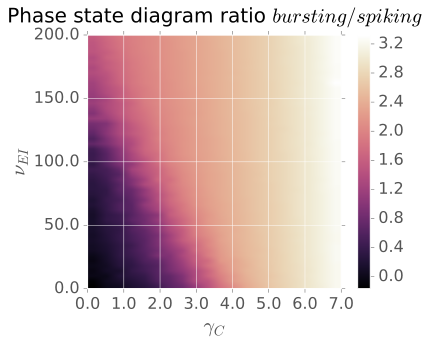

In [14]:
c=0
figsize = (20,10)
fig = plt.figure(figsize=figsize)
gridsize=60
# ###################################
# # spiking
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $spiking$'
# filename = "global_gap_junctions_c%d_spiking.pdf" %c
# column = 'non-burst'
# ax = fig.add_subplot(231)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# ###################################
# # bursting
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $bursting$'
# filename = "global_gap_junctions_c%d_bursting.pdf" %c
# dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
# column = 'logburst'
# ax = fig.add_subplot(232)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# ###################################
# # ratio
# ###################################
# df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
# df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
# dataframe = df_sliced
# title = r'Phase state diagram ratio $bursting/spiking$'
# filename = "global_gap_junctions_c%d_ratio.pdf"
# column = 'ratio'
# ax = fig.add_subplot(233)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# # ###################################
# # # corI
# # ###################################
# # dataframe = df[(df['freq']<1000)]
# # title = r'Phase state diagram $corI$')
# # filename = "global_gap_junctions_c%d_corI.pdf" %c
# # column = 'corI'
# # fig = plt.figure(figsize=figsize)
# # ax = fig.add_subplot(111)
# # plotDiagram(fig, ax, dataframe, title, column, filename)

# ###################################
# # power
# ###################################
# dataframe = df[(df['freq']<1000)]
# ttl = r'Phase state diagram $P_dB(f)$'
# filename = "global_gap_junctions_c%d_power.pdf" %c
# dataframe['logpower'] =(dataframe['power']).apply(np.log10)
# column = 'logpower'
# ax = fig.add_subplot(234)
# gr.plotDiagram(fig, ax, dataframe, ttl, column, filename, save=None, front=False, gridsize=gridsize )

# ###################################
# # power freq
# ###################################
# dataframe = df[(df['freq']<1000)]
# dataframe['logpower'] =(dataframe['power']).apply(np.log10)
# dataframe['freq']=dataframe['freq'].fillna(0)
# dataframe['freq'] =(dataframe[['freq','logpower']]).apply(lambda x: x[0]*(x[1]>-1)*1, axis=1)

# title = r'Phase state diagram $freq  Pdb>0.1$'
# filename = "global_gap_junctions_c%d_power_freq.pdf" %c
# column = 'freq'
# ax = fig.add_subplot(235)
# gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None,  front=False, gridsize=gridsize )
# plt.tight_layout()
# plt.savefig(DIRECTORY + 'all-diagrams.pdf')
# plt.savefig(DIRECTORY + 'all-diagrams')

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
g0 = 7
df_sliced['non-burst'] = (df_sliced[['non-burst', 'gammaC']]).apply(lambda x: x[0]*((g0-x[1])/g0)**4, axis=1)
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_c%d_ratio_corr.pdf"
column = 'ratio'
ax = fig.add_subplot(236)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )
df_sliced['non-burst'].head()

In [20]:
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
df_sliced['non-burst']=(df_sliced[['non-burst', 'gammaC']]).apply(lambda x: x[0]*1, axis=1)
df_sliced['non-burst']

0       0.006320
1       0.006470
2       0.006389
3       0.006877
4       0.006808
5       0.006643
6       0.006565
7       0.006725
8       0.007219
9       0.007419
10      0.007019
11      0.007083
12      0.007152
13      0.006938
14      0.007356
15      0.007287
16      0.007891
17      0.007829
18      0.007665
19      0.007718
20      0.007475
21      0.007604
22      0.007787
23      0.007558
24      0.008242
25      0.008186
26      0.008140
27      0.008266
28      0.008087
29      0.008053
          ...   
3470    0.007360
3471    0.007233
3472    0.007779
3473    0.007570
3474    0.007655
3475    0.007610
3476    0.007738
3477    0.007526
3478    0.007445
3479    0.007649
3480    0.007990
3481    0.008031
3482    0.008113
3483    0.007822
3484    0.008013
3485    0.007903
3486    0.008157
3487    0.007906
3488    0.008282
3489    0.008238
3490    0.008409
3491    0.008450
3492    0.008325
3493    0.008451
3494    0.008197
3495    0.008366
3496    0.008575
3497    0.0086

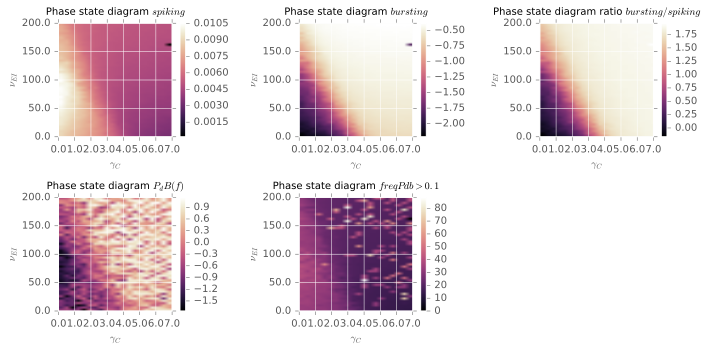

In [23]:
##### INDIV PLOTS

c=0
figsize = (10,5)
fig = plt.figure(figsize=figsize)
gridsize=60
###################################
# spiking
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $spiking$'
filename = "global_gap_junctions_c%d_spiking.pdf" %c
column = 'non-burst'
ax = fig.add_subplot(231)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

###################################
# bursting
###################################
dataframe = df[(df['freq']<1000)]
title = r'Phase state diagram $bursting$'
filename = "global_gap_junctions_c%d_bursting.pdf" %c
dataframe['logburst'] =(dataframe['burst']).apply(np.log10)
column = 'logburst'
ax = fig.add_subplot(232)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

###################################
# ratio
###################################
df_sliced = df[(df['freq']<1000) & (df['burst']>0.00001)]
df_sliced['ratio'] =((df_sliced['burst'])/df_sliced['non-burst']).apply(np.log10)
dataframe = df_sliced
title = r'Phase state diagram ratio $bursting/spiking$'
filename = "global_gap_junctions_c%d_ratio.pdf"
column = 'ratio'
ax = fig.add_subplot(233)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None, gridsize=gridsize )

# ###################################
# # corI
# ###################################
# dataframe = df[(df['freq']<1000)]
# title = r'Phase state diagram $corI$')
# filename = "global_gap_junctions_c%d_corI.pdf" %c
# column = 'corI'
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111)
# plotDiagram(fig, ax, dataframe, title, column, filename)

###################################
# power
###################################
dataframe = df[(df['freq']<1000)]
ttl = r'Phase state diagram $P_dB(f)$'
filename = "global_gap_junctions_c%d_power.pdf" %c
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
column = 'logpower'
ax = fig.add_subplot(234)
gr.plotDiagram(fig, ax, dataframe, ttl, column, filename, save=None, front=False, gridsize=gridsize )

###################################
# power freq
###################################
dataframe = df[(df['freq']<1000)]
dataframe['logpower'] =(dataframe['power']).apply(np.log10)
# dataframe = dataframe[(dataframe['logpower']>-1)]
title = r'Phase state diagram $freq  Pdb>0.1$'
filename = "global_gap_junctions_c%d_power_freq.pdf" %c
column = 'freq'
ax = fig.add_subplot(235)
gr.plotDiagram(fig, ax, dataframe, title, column, filename, save=None,  front=False, gridsize=gridsize )
plt.tight_layout()
plt.savefig(DIRECTORY + 'all-diagrams.pdf')
plt.savefig(DIRECTORY + 'all-diagrams')

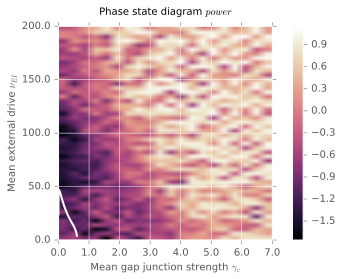

In [24]:
###################################
# bursting
###################################
fig = plt.figure(figsize=(6,4))
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('lines', linewidth=2)
ax = fig.add_subplot(111)

dataframe = df[(df['freq']<1000)]
dataframe['logpower']= (dataframe['power']).apply(np.log10)
title = r'Phase state diagram $power$'
filename = "global_gap_junctions_bursting.pdf" 
column = 'logpower'

gr.plotDiagram(fig, ax, dataframe, title, column, filename)

df_sliced = dataframe[(dataframe['logpower']>-1.74) & (dataframe['logpower']<-1.50)]
contour = df_sliced[['gammaC','nuEI']].get_values()
yvals, xvals = gr.bezier_curve(contour, nTimes=100)
frontier = np.array([xvals,yvals])
plt.ylabel(r'Mean external drive $\nu_{EI}$')
plt.xlabel(r'Mean gap junction strength $\gamma_c$')
plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
# plt.plot(contour[:,0], contour[:,1], '.')
# plt.plot(pt[:,1], pt[:,0], '.')
plt.savefig(DIRECTORY + 'bursting_phase_plan.pdf')

In [ ]:
# da = dataframe[(dataframe['nuEI']==50)]
# da['logpower']= (da['power']).apply(np.log10)
# val = da[['logpower']].get_values()
# plt.plot(val)
# dataframe.head()x

In [12]:
### FUNCTION to get values of gamma returning nearest value of power

# pt = np.zeros(shape=(100,2))
# for i in range(100):
#     da = dataframe[(dataframe['nuEI']==(2*i))]
#     da['logpower']= (da['power']).apply(np.log10)
#     try:
#         val = da[['logpower']].get_values()
#         pt[i,:]=[2*i,gr.find_nearest(val, -1.5,dataframe)[2]]
#     except: 
#         print(2*i)
#         pass

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# # contour = np.array(contour)
# # yvals, xvals = bezier_curve(contour, nTimes=100)
# # frontier = np.array([xvals,yvals])

# # plt.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2)
# # plt.plot(contour[:,0], contour[:,1], '.')

# frontgamma(60,frontier)
print(gr.fixpoint(df,100, 0.89, 5))

0


In [14]:
# for i in range(6):
#     print(np.mean(Z[i]))
    
# print(Z1[20])

In [25]:
# @autojit
def overunder(df, frontier, rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    if rule in [0,1,5,3]:
        col = np.arange(0,2,0.05) #ratio for active rule
    else:
        col = np.arange(0,120,3) #ratio for passive rule
    row = np.arange(0,200,1) #nu
    Z = np.zeros(shape=(len(row),len(col)))
    for i,ratio in enumerate(col):
        for j, nuEI in enumerate(row):
            f= gr.fixpoint(df, nuEI, ratio, rule,3)
            border = gr.frontgamma(nuEI, frontier)
            Z[len(row)-1-j,len(col)-1-i] = (border-f)*((border>f) and (f>1) and (nuEI>48))*1.0
    return Z

Z = Parallel(n_jobs=num_cores)(delayed(overunder)(dataframe, frontier,i) for i in range(6))

Z1 = Z[1] # hardbound spiking
Z2 = Z[0] # softbound spiking
Z3 = Z[3] # spiking non bursting 
Z4 = Z[4] # hardbound passive rule
Z5 = Z[5] # hardbound spiking non bursting 
Zpassive = Z[2] # softbound passive rule (all non bursting neurons are potentiated)

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/GP1514/.pyenv/versions/

##$ratio = \frac{LTD}{LTP}$

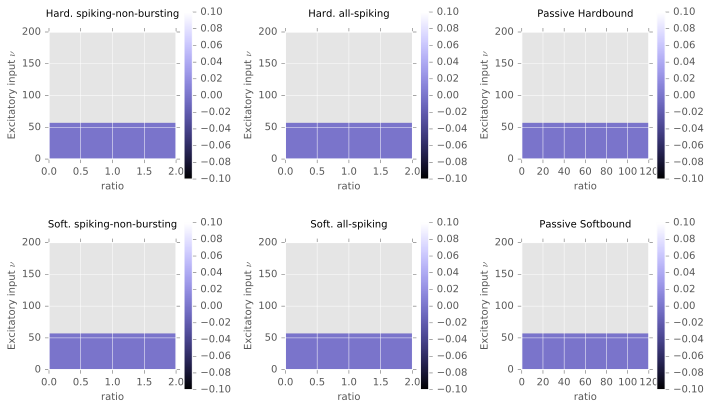

In [26]:
'''
Plot the \dot(gamma) as function of \gamma for hardbound
'''

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('lines', linewidth=2)

cx_blue = cubehelix.cmap(reverse=False, start=3., rot=0)

fig = plt.figure(figsize=(10,6))

extent1 = [0,2.0,0,200]
extent2 = [0,120,0,200]

extent = extent1
ax6 = fig.add_subplot(232)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Hard. all-spiking', y=1.08)
# ax6.set_yticks([0,50,100,150])
# ax6.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z1, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=extent[1]/extent[3])#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(231)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Hard. spiking-non-bursting', y=1.08)
# ax5.set_yticks([0,50,100,150])
# ax5.set_yticklabels([50,100,150,200])
image = ax5.imshow(Z5, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=extent[1]/extent[3])#, cmap =cx4)# drawing the function
plt.colorbar(image)

# plt.savefig(DIRECTORY + 'soft_vs_hard_all.pdf')
extent = extent2
ax7 = fig.add_subplot(233)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Hardbound', y=1.08)
# ax7.set_yticks([0,50,100,150])
# ax7.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Z4, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=extent[1]/extent[3])#, cmap =cx4)# drawing the function
plt.colorbar(image)
# plt.tight_layout()
# plt.savefig(DIRECTORY + 'hardbound.pdf')

'''
plot the \dot(gamma) as function of \gamma for hardbound and softbound eLTP and for two excitatory input levels
'''
extent=extent1
ax6 = fig.add_subplot(235)
ax6.set_xlabel('ratio')
ax6.set_ylabel(r'Excitatory input $\nu$')
ax6.set_title('Soft. all-spiking', y=1.08)
# ax6.set_yticks([0,50,100,150])
# ax6.set_yticklabels([50,100,150,200])
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax6.imshow(Z2, interpolation='nearest', extent=extent1,cmap=cx_blue, aspect=extent[1]/extent[3])#, cmap =cx4)# drawing the function
plt.colorbar(image)

ax5 = fig.add_subplot(234)
ax5.set_xlabel('ratio')
ax5.set_ylabel(r'Excitatory input $\nu$')
ax5.set_title('Soft. spiking-non-bursting', y=1.08)
# ax5.set_yticks([0,50,100,150])
# ax5.set_yticklabels(tk)
image = ax5.imshow(Z3, interpolation='nearest', extent=extent1, cmap=cx_blue, aspect=extent[1]/extent[3])#, cmap =cx4)# drawing the function
plt.colorbar(image)

extent = extent2
ax7 = fig.add_subplot(236)
ax7.set_xlabel('ratio')
ax7.set_ylabel(r'Excitatory input $\nu$')
ax7.set_title('Passive Softbound', y=1.08)
# ax7.set_yticks([0,50,100,150])
# ax7.set_yticklabels(tk)
cx4 = cubehelix.cmap(reverse=False, start=0., rot=0.5)
image = ax7.imshow(Zpassive, interpolation='nearest', extent=extent2,cmap=cx_blue, aspect=extent[1]/extent[3])#, cmap =cx4)# drawing the function
plt.colorbar(image)
plt.tight_layout()
plt.savefig(DIRECTORY + 'soft_hard_horizontal.pdf')

## Position of the FP($\gamma$) for a fixed ratio

/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


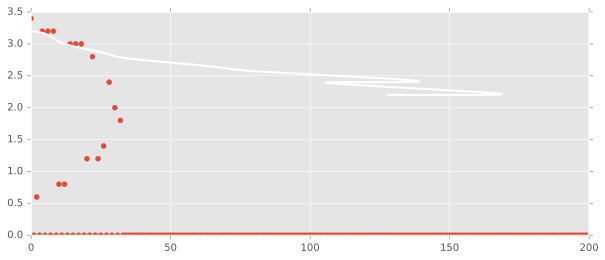

In [26]:
def overunder(df, frontier,rule):
    '''
    return 0 if fixpoint over in the SYNC regime, 1 otherwise
    '''
    ratio = 1.5 #ratio for active rule

    row = np.arange(0,200,1) #nu
    Z = []
    dist = []
    
    for j, nuEI in enumerate(row):
        f= gr.fixpoint(df, nuEI, ratio, rule)
        border = gr.frontgamma(nuEI, frontier)
        dist.append(border-f)
        Z.append(f)
    return Z, dist

Z,dist = overunder(dataframe, frontier,0)
# Z1 = Z[1] # hardbound spiking
# Z2 = Z[0] # softbound spiking
# Z3 = Z[3] # spiking non bursting 
# Z4 = Z[4] # hardbound passive rule
# Z5 = Z[5] # hardbound spiking non bursting 
plt.plot(Z,'.',markersize=10, linewidth=4)
plt.plot(frontier[0,:], frontier[1,:], '-w', linewidth=2)

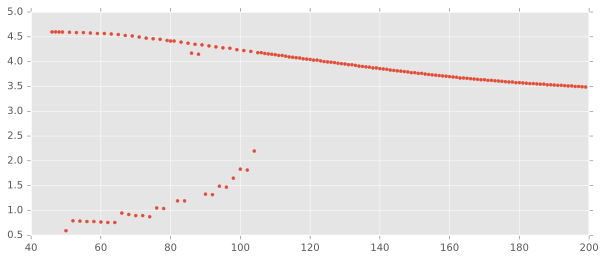

In [48]:
plt.plot(dist,'.')

In [38]:
-2*False

0